In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import os

In [2]:
train = pd.read_csv('/kaggle/input/hms-harmful-brain-activity-classification/train.csv')
train_eeg_path = '/kaggle/input/hms-harmful-brain-activity-classification/train_eegs/'

In [3]:
train.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


# MEL_SPECTROGRAM Function

In [4]:
import librosa

def spectrogram_from_eeg(parquet_path, display=True):
    
    # LOAD MIDDLE 50 SECONDS OF EEG SERIES
    eeg = pd.read_parquet(parquet_path)
    middle = (len(eeg)-10_000)//2
    eeg = eeg.iloc[middle:middle+10_000]
    
    x = np.array(eeg['EKG'])
    
    #print('this is x: ', x)
    
    x = np.nan_to_num(x, copy=False)
    # RAW SPECTROGRAM
    mel_spec = librosa.feature.melspectrogram(y=x, sr=200, hop_length=len(x)//256, 
          n_fft=1024, n_mels=128, fmin=0, fmax=20, win_length=128)

    # LOG TRANSFORM
    width = (mel_spec.shape[1]//32)*32
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max).astype(np.float32)[:,:width]

    # STANDARDIZE TO -1 TO 1
    mel_spec_db = (mel_spec_db+40)/40 
        
    return mel_spec_db


# Visualization

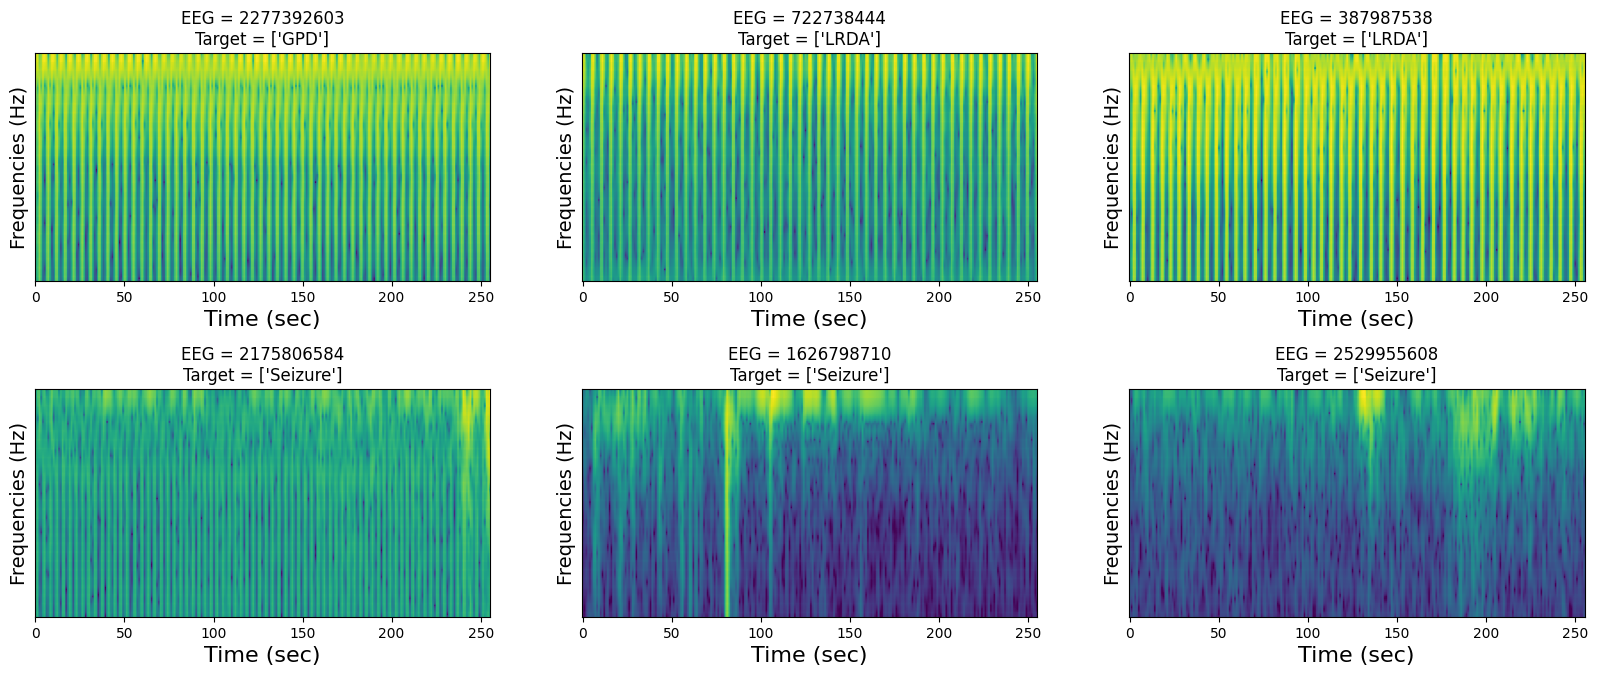

In [5]:
plt.figure(figsize=(20,8))
ROWS = 2
COLS = 3
for i in range(1,7):
    sample_id = train.eeg_id.unique()[i]
    tars = train[train.eeg_id == train.eeg_id.unique()[i]]['expert_consensus'].unique()
    plt.subplot(ROWS, COLS, i)
    sample_path = f'/kaggle/input/hms-harmful-brain-activity-classification/train_eegs/{sample_id}.parquet'
    spec = spectrogram_from_eeg(sample_path)
    plt.imshow(spec)
    
    
    plt.title(f'EEG = {sample_id}\nTarget = {tars}',size=12)
    plt.yticks([])
    plt.ylabel('Frequencies (Hz)',size=14)
    plt.xlabel('Time (sec)',size=16)

# Saving Files

In [6]:
%%time
PATH = '/kaggle/input/hms-harmful-brain-activity-classification/train_eegs/'
directory_path = 'EKG_Spectrograms/'
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    
DISPLAY = 4
EEG_IDS = train.eeg_id.unique()
all_ekgs = {}

for i,eeg_id in enumerate(EEG_IDS):
    if (i%100==0)&(i!=0): print(i,', ',end='')
        
    # CREATE SPECTROGRAM FROM EEG PARQUET
    img = spectrogram_from_eeg(f'{PATH}{eeg_id}.parquet', i<DISPLAY)

    # SAVE TO DISK
    if i==DISPLAY:
        print(f'Creating and writing {len(EEG_IDS)} spectrograms to disk... ',end='')
    np.save(f'{directory_path}{eeg_id}',img)
    all_ekgs[eeg_id] = img
    
   #SAVE EEG SPECTROGRAM DICTIONARY
np.save('/kaggle/working/ekg_specs',all_ekgs)

os.listdir()

Creating and writing 17089 spectrograms to disk... 100 , 200 , 300 , 400 , 500 , 600 , 700 , 800 , 900 , 1000 , 1100 , 1200 , 1300 , 1400 , 1500 , 1600 , 1700 , 1800 , 1900 , 2000 , 2100 , 2200 , 2300 , 2400 , 2500 , 2600 , 2700 , 2800 , 2900 , 3000 , 3100 , 3200 , 3300 , 3400 , 3500 , 3600 , 3700 , 3800 , 3900 , 4000 , 4100 , 4200 , 4300 , 4400 , 4500 , 4600 , 4700 , 4800 , 4900 , 5000 , 5100 , 5200 , 5300 , 5400 , 5500 , 5600 , 5700 , 5800 , 5900 , 6000 , 6100 , 6200 , 6300 , 6400 , 6500 , 6600 , 6700 , 6800 , 6900 , 7000 , 7100 , 7200 , 7300 , 7400 , 7500 , 7600 , 7700 , 7800 , 7900 , 8000 , 8100 , 8200 , 8300 , 8400 , 8500 , 8600 , 8700 , 8800 , 8900 , 9000 , 9100 , 9200 , 9300 , 9400 , 9500 , 9600 , 9700 , 9800 , 9900 , 10000 , 10100 , 10200 , 10300 , 10400 , 10500 , 10600 , 10700 , 10800 , 10900 , 11000 , 11100 , 11200 , 11300 , 11400 , 11500 , 11600 , 11700 , 11800 , 11900 , 12000 , 12100 , 12200 , 12300 , 12400 , 12500 , 12600 , 12700 , 12800 , 12900 , 13000 , 13100 , 13200 , 1

['__notebook__.ipynb', 'ekg_specs.npy', 'EKG_Spectrograms']

In [7]:
#%cd /kaggle/working
#!zip -r file.zip EKG_Spectrograms

In [8]:
#FileLink(r'file.zip')